<h1>Demographic Filtering<h6>

The System recommends the same movies to users with similar demographic features. Since each user is different , this approach is considered to be too simple. The basic idea behind this system is that movies that are more popular and critically acclaimed will have a higher probability of being liked by the average audience.

In [59]:
%pip install --upgrade pip

Note: you may need to restart the kernel to use updated packages.


In [60]:
%pip install scikit-learn
%pip install scikit-surprise 
%pip install wheel setuptools pip --upgrade

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [61]:
%pip install --use-pep517 surprise


Note: you may need to restart the kernel to use updated packages.


In [62]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel
from ast import literal_eval #parse the stringifies features int their corresponding objects
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from surprise import Reader, Dataset, SVD
from surprise.model_selection import cross_validate
from surprise.model_selection import train_test_split

In [63]:
df1 = pd.read_csv(r'C:\Users\irhamyfarhanhariz.lu\OneDrive - PETRONAS\Desktop\Personal\Projects\Machine Learning\RecommenderSystem\tmdb_5000\tmdb_5000_credits.csv')
df2 = pd.read_csv(r'C:\Users\irhamyfarhanhariz.lu\OneDrive - PETRONAS\Desktop\Personal\Projects\Machine Learning\RecommenderSystem\tmdb_5000\tmdb_5000_movies.csv')

In [64]:
df1 

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."
...,...,...,...,...
4798,9367,El Mariachi,"[{""cast_id"": 1, ""character"": ""El Mariachi"", ""c...","[{""credit_id"": ""52fe44eec3a36847f80b280b"", ""de..."
4799,72766,Newlyweds,"[{""cast_id"": 1, ""character"": ""Buzzy"", ""credit_...","[{""credit_id"": ""52fe487dc3a368484e0fb013"", ""de..."
4800,231617,"Signed, Sealed, Delivered","[{""cast_id"": 8, ""character"": ""Oliver O\u2019To...","[{""credit_id"": ""52fe4df3c3a36847f8275ecf"", ""de..."
4801,126186,Shanghai Calling,"[{""cast_id"": 3, ""character"": ""Sam"", ""credit_id...","[{""credit_id"": ""52fe4ad9c3a368484e16a36b"", ""de..."


In [65]:
df2.head(2)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500


In [66]:
len(df2.axes[1])

20

In [67]:
df1.columns = ['id','title','cast','crew']
df3 = df2.merge(df1, on='id')

In [68]:
df3.head(2)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,runtime,spoken_languages,status,tagline,title_x,vote_average,vote_count,title_y,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."


In [69]:
len(df3.axes[1])

23

In [70]:
#Based on the IMDB 

#weighted rating (WR) = (v ÷ (v+m)) × R + (m ÷ (v+m)) × C where:

#R = average for the movie (mean) = (Rating)
#v = number of votes for the movie = (votes)
#m = minimum votes required to be listed in the Top 250 
#C = the mean vote across the whole report 

In [71]:
C = df3['vote_average'].mean()
print("The mean vote across the whole report (C) =", C)

The mean vote across the whole report (C) = 6.092171559442016


In [72]:
# since C = 6.092, we can assume the approx mean rating for the movies is 6 on a scale of 10. 

# to deternmine the minimum votes required to be listed in the chart (m), We will use 90th percentile as our cutoff. 
# In other words, for a movie to feature in the charts, it must have more votes than at least 90% of the movies in the list.

In [73]:
m = df2['vote_count'].quantile(0.9)
print(" the minimum votes required to be listed in the chart (m) =",m)

 the minimum votes required to be listed in the chart (m) = 1838.4000000000015


In [74]:
# filter movies that are qualify for the chart

q_movies = df3.copy().loc[df2['vote_count'] >= m]
q_movies.shape

(481, 23)

In [75]:
# movies that qualify = 481 movies

In [76]:
# Now we calculate our metric for each qualified movie.
# To do this, we will define a function, weighted_rating() and define a new feature score, 
# of which we'll calculate the value by applying this function to our DataFrame of qualified movies

In [77]:
def weighted_rating (x, m=m, C=C):
    v = x['vote_count']
    R = x['vote_average']
    
    #based on the IMDB formula
    return (v/(v+m) * R) + (m/(m+v) * C)

In [78]:
# Define a new feature 'score' and calculate its value with `weighted_rating()

q_movies['score'] = q_movies.apply(weighted_rating, axis=1)

In [79]:
# sort the DataFrame based on the score feature and output the title, vote count, vote average and weighted rating or score of the top 10 movies.

In [80]:
#sort movies based on score calculate above

q_movies = q_movies.sort_values('score', ascending=False)

q_movies[['original_title','vote_count','vote_average','score']].head(15)

,original_title,vote_count,vote_average,score
1881,The Shawshank Redemption,8205,8.5,8.059258
662,Fight Club,9413,8.3,7.939256
65,The Dark Knight,12002,8.2,7.920020
3232,Pulp Fiction,8428,8.3,7.904645
96,Inception,13752,8.1,7.863239
3337,The Godfather,5893,8.4,7.851236
95,Interstellar,10867,8.1,7.809479
809,Forrest Gump,7927,8.2,7.803188
329,The Lord of the Rings: The Return of the King,8064,8.1,7.727243
1990,The Empire Strikes Back,5879,8.2,7.697884


Text(0.5, 1.0, 'Popular Movies')

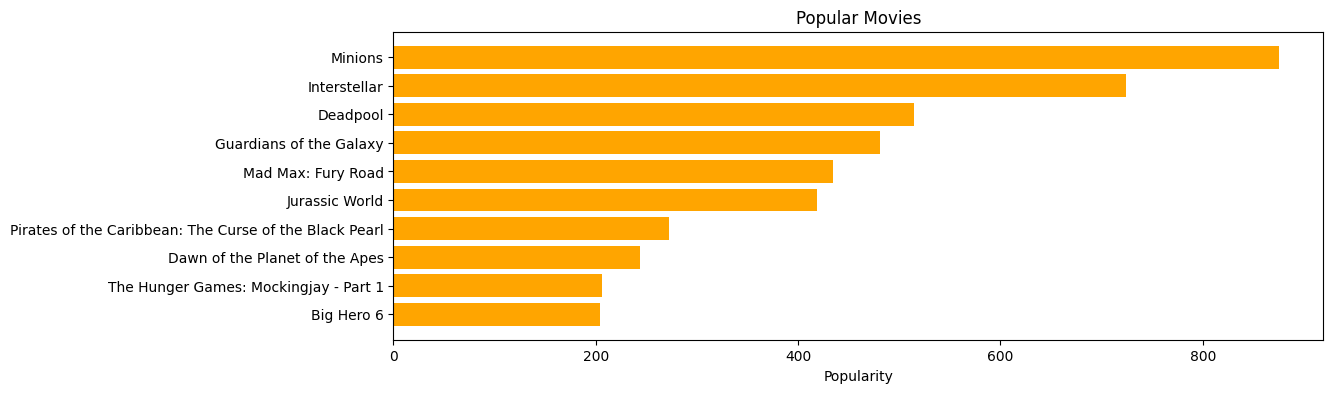

In [81]:
pop = df3.sort_values('popularity', ascending=False)

plt.figure(figsize=(12,4))
plt.barh(pop['original_title'].head(10),pop['popularity'].head(10), align='center', 
         color='orange')
plt.gca().invert_yaxis()
plt.xlabel("Popularity")
plt.title("Popular Movies")

<h1>Content Based Filtering<h6>

In this recommender system the content of the movie (overview, cast, crew, keyword, tagline etc) is used to find its similarity with other movies. Then the movies that are most likely to be similar are recommended.

<h1>Plot description based Recommender<h6>

We will compute pairwise similarity scores for all movies based on their plot descriptions and recommend movies based on that similarity score. The plot description is given in the overview feature of our dataset.

In [82]:
df3['overview'].head(10)

0    In the 22nd century, a paraplegic Marine is di...
1    Captain Barbossa, long believed to be dead, ha...
2    A cryptic message from Bond’s past sends him o...
3    Following the death of District Attorney Harve...
4    John Carter is a war-weary, former military ca...
5    The seemingly invincible Spider-Man goes up ag...
6    When the kingdom's most wanted-and most charmi...
7    When Tony Stark tries to jumpstart a dormant p...
8    As Harry begins his sixth year at Hogwarts, he...
9    Fearing the actions of a god-like Super Hero l...
Name: overview, dtype: object

<small>To effectively process text data, it's essential to convert word vectors into TF-IDF vectors. Term Frequency (TF) gauges the frequency of a word's occurrence in a document relative to the total number of words in that document. Inverse Document Frequency (IDF) assesses the significance of a word across multiple documents by considering how many documents contain that word.</small>

<small>Multiplying TF and IDF yields a representation where each column represents a word in the overview vocabulary, and each row represents a movie. This matrix reduces the influence of common words found in plot overviews, thereby improving the accuracy of similarity scores between movies.</small>


In [83]:
#Remove all english stop words such as 'the', 'a'..
tfidf = TfidfVectorizer(stop_words='english')

#Replace Nan with empty string
df3['overview'] = df3['overview'].fillna('')

#construct the required TF-IDF matrix by fitting and transforming the data
tfidf_matrix = tfidf.fit_transform(df3['overview'])

#output the shape of tfidf_matrix
tfidf_matrix.shape

(4803, 20978)

In [84]:
#We see that over 20,000 different words were used to describe the 4800 movies in our dataset.

<small>With this matrix in hand, we can now compute a similarity score.

We will be using the cosine similarity to calculate a numeric quantity that denotes the similarity between two movies. We use the cosine similarity score since it is independent of magnitude and is relatively easy and fast to calculate.

Since we have used the TF-IDF vectorizer, calculating the dot product will directly give us the cosine similarity score. Therefore, we will use sklearn's linear_kernel() instead of cosine_similarities() since it is faster.</small>



In [85]:
# Compute the cosine similarity matrix

cos_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

In [86]:
# define a function that takes in a movie title as an input and outputs a list of the 10 most similar movies
# we need a reverse mapping of movie titles and DataFrame indices.

indices = pd.Series(df3.index, index=df3['original_title']).drop_duplicates()

In [87]:
# now we define our function for this recommendation function
#These are the following steps we'll follow :-

#Get the index of the movie given its title.
#Get the list of cosine similarity scores for that particular movie with all movies. Convert it into a list of tuples where the first element is its position and the second is the similarity score.
#Sort the aforementioned list of tuples based on the similarity scores; that is, the second element.
#Get the top 10 elements of this list. Ignore the first element as it refers to self (the movie most similar to a particular movie is the movie itself).
#Return the titles corresponding to the indices of the top elements.


In [88]:
def get_recommendations(title, cos_sim=cos_sim):  # this function that movie name as input and output most similar movies 
    idx = indices[title]  # get index of movies that matches the title
    sim_scores = list(enumerate(cos_sim[idx])) # get pairwise similarity scores of all movies with that movie
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True) # sort based on similarity
    sim_scores = sim_scores[1:11]
    movies_indices = [i[0] for i in sim_scores] # get movie indices
    return df3['original_title'].iloc[movies_indices] # return 10 most similar movies




In [89]:
get_recommendations('The Dark Knight Rises')

65                              The Dark Knight
299                              Batman Forever
428                              Batman Returns
1359                                     Batman
3854    Batman: The Dark Knight Returns, Part 2
119                               Batman Begins
2507                                  Slow Burn
9            Batman v Superman: Dawn of Justice
1181                                        JFK
210                              Batman & Robin
Name: original_title, dtype: object

In [90]:
get_recommendations('Spider-Man')

5                    Spider-Man 3
38       The Amazing Spider-Man 2
20         The Amazing Spider-Man
30                   Spider-Man 2
1534                Arachnophobia
953     Gremlins 2: The New Batch
1720                     Kick-Ass
2740                  The New Guy
3216                     Election
1572    Forgetting Sarah Marshall
Name: original_title, dtype: object

<h1>Credits, Genres and Keywords Based Recommender<h6>

In [91]:
features = ['cast','crew','keywords','genres']

for feature in features:
    df3[feature] = df3[feature].apply(literal_eval)

In [92]:
# function to extract required information from each features 

def get_director(x): # get director name from crew feature. If not director then return NaN
    for i in x:
        if i['job'] == 'Director':
            return i['name']
    return np.nan
    
def get_list(x): # returns the list top 3 elements or entire list
    if isinstance(x, list):
        names = [i['name'] for i in x] 
        # check if more than 3 elements exist. yes = return only first 3. no = return entire list
        if len(names) > 3:
            names = names[:3]
        return names
    return [] # return empty list if missing data



In [93]:
# Define new director, cast, genres and keywords features that are in a suitable form.

df3['director'] = df3['crew'].apply(get_director)

features = ['cast','keywords', 'genres']

for feature in features:
    df3[feature] = df3[feature].apply(get_list)

In [94]:
# print new features of first 5 movies

df3[['original_title','cast','director','keywords','genres']].head(10)

,original_title,cast,director,keywords,genres
0,Avatar,"[Sam Worthington, Zoe Saldana, Sigourney Weaver]",James Cameron,"[culture clash, future, space war]","[Action, Adventure, Fantasy]"
1,Pirates of the Caribbean: At World's End,"[Johnny Depp, Orlando Bloom, Keira Knightley]",Gore Verbinski,"[ocean, drug abuse, exotic island]","[Adventure, Fantasy, Action]"
2,Spectre,"[Daniel Craig, Christoph Waltz, Léa Seydoux]",Sam Mendes,"[spy, based on novel, secret agent]","[Action, Adventure, Crime]"
3,The Dark Knight Rises,"[Christian Bale, Michael Caine, Gary Oldman]",Christopher Nolan,"[dc comics, crime fighter, terrorist]","[Action, Crime, Drama]"
4,John Carter,"[Taylor Kitsch, Lynn Collins, Samantha Morton]",Andrew Stanton,"[based on novel, mars, medallion]","[Action, Adventure, Science Fiction]"
5,Spider-Man 3,"[Tobey Maguire, Kirsten Dunst, James Franco]",Sam Raimi,"[dual identity, amnesia, sandstorm]","[Fantasy, Action, Adventure]"
6,Tangled,"[Zachary Levi, Mandy Moore, Donna Murphy]",Byron Howard,"[hostage, magic, horse]","[Animation, Family]"
7,Avengers: Age of Ultron,"[Robert Downey Jr., Chris Hemsworth, Mark Ruff...",Joss Whedon,"[marvel comic, sequel, superhero]","[Action, Adventure, Science Fiction]"
8,Harry Potter and the Half-Blood Prince,"[Daniel Radcliffe, Rupert Grint, Emma Watson]",David Yates,"[witch, magic, broom]","[Adventure, Fantasy, Family]"
9,Batman v Superman: Dawn of Justice,"[Ben Affleck, Henry Cavill, Gal Gadot]",Zack Snyder,"[dc comics, vigilante, superhero]","[Action, Adventure, Fantasy]"


In [95]:
# convert all strings to lower case and spaces
# so that vecotrizer doest confuse eg Johnny Depp and Johnny Galecki

def clean_data(x):
    if isinstance(x, list):
        return [str.lower(i.replace(" "," ")) for i in x]
    else:
        if isinstance(x, str): # check if directory exist, return empty string if does not
            return str.lower(x.replace(" "," "))
        else:
            return ''

In [96]:
features = ['cast', 'keywords', 'director', 'genres'] # apply clean_data function to your features

for feature in features:
    df3[feature] = df3[feature].apply(clean_data)

# now we create strings that contains all the metadata, then we input this metadata into our vectorizer
def create_soup(x):
    return ' '.join(x['keywords']) + ' ' + ' '.join(x['cast']) + ' ' + x['director'] + ' ' + ' '.join(x['genres'])
df3['soup'] = df3.apply(create_soup, axis=1)

In [97]:
#The next steps are the same as what we did with our plot description based recommender. One important difference is that we use the CountVectorizer() instead of TF-IDF. 
#This is because we do not want to down-weight the presence of an actor/director if he or she has acted or directed in relatively more movies. It doesn't make much intuitive sense.

In [98]:
count = CountVectorizer(stop_words='english')
count_matrix = count.fit_transform(df3['soup'])

In [99]:
cos_sim2 = cosine_similarity(count_matrix, count_matrix) #compute the cosine similarity basd on the count_matrix 

In [100]:
# reset index of main dataframe and construct reverse mapping as before 
df3 = df3.reset_index()
indices = pd.Series(df3.index, index=df3['original_title'])

In [101]:
#We can now reuse our get_recommendations() function by passing in the new cos_sim2 matrix as our second argument.

get_recommendations('Spider-Man', cos_sim2)

5                     Spider-Man 3
30                    Spider-Man 2
2157                   Daybreakers
2592           Highlander: Endgame
1193     The Count of Monte Cristo
131                        G-Force
1514        The Quick and the Dead
37      Oz: The Great and Powerful
259        Speed 2: Cruise Control
677       Clear and Present Danger
Name: original_title, dtype: object

In [102]:
get_recommendations('Transformers', cos_sim2)

35      Transformers: Revenge of the Fallen
52           Transformers: Dark of the Moon
36          Transformers: Age of Extinction
242                          Fantastic Four
238            Teenage Mutant Ninja Turtles
4401                    The Helix... Loaded
83                               The Lovers
101                      X-Men: First Class
91             Independence Day: Resurgence
220                              Prometheus
Name: original_title, dtype: object

In [103]:
# limititation of content-based recommender: 
# - only capable of suggesting movies which are close to certain movies
# - not capable of capturing tastes and providing recommendations acress genres
# - does not personalize based on the users tastes 

# To overcome this we use Collaborative Filtering (2 types)
# 1. User-based filtering
# 2. Item-based filtering

<h1>User-based Collaborative Filtering<h6>

- recommend products to user that other users also liked.
- Uses pearson correlation/cosine similarity.

cons 

- user preference may change over time this indicates metric precomputing based on neighboring users may lead to bad performance


<h1>Item-based Collaborative Filtering<h6>

- recommends item based on their similarity with the items that the target user rated. 
- uses pearson correlation/cosine similarity
- MAJOR difference --> Item_based fill in the blank vertically instead of horizontally.

cons

- issues with scalability and sparsity 

<h1>Single Value Decomposition (SVD) <h6>

- leveraging latent factor model to tackle scalability and sparsity issue to capture similarity between users and items.

- Essentially, we want to turn the recommendation problem into an optimization problem, we can view it as how good we are in predicting the rating for items given a user. 

- One common metric = Root Mean Square Error (RMSE). The lower the RMSE, the better the performance of the recommender 

latent factor: 

- It is a broad idea which describes a property or concept that a user or an item have. For instance, for music, latent factor can refer to the genre that the music belongs to. SVD decreases the dimension of the utility matrix by extracting its latent factors. Essentially, we map each user and each item into a latent space with dimension r. Therefore, it helps us better understand the relationship between users and items as they become directly comparable.

- Since the dataset we used before did not have userId(which is necessary for collaborative filtering) let's load another dataset. We'll be using the Surprise library to implement SVD.


In [104]:
reader = Reader()
ratings = pd.read_csv('C:/Users/irhamyfarhanhariz.lu/OneDrive - PETRONAS/Desktop/Personal/Projects/Machine Learning/RecommenderSystem/TheMovieDataSet/ratings_small.csv')

ratings.head()

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205


In [105]:
data = Dataset.load_from_df(ratings[['userId','movieId','rating']], reader)

# Split the data into train and test sets
trainset, testset = train_test_split(data, test_size=0.2, random_state=42)

In [108]:
# Define the SVD algorithm
algo = SVD()

# Perform cross-validation
cv_results = cross_validate(algo, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

# Extract RMSE and MAE from cv_results
rmse_values = cv_results['test_rmse']
mae_values = cv_results['test_mae']

# Print results
print("------------")
for i, (rmse, mae) in enumerate(zip(rmse_values, mae_values), start=1):
    print(f"Fold {i}")
    print(f"RMSE: {rmse:.4f}")
    print(f"MAE:  {mae:.4f}")
    print("------------")

print("------------")
print(f"Mean RMSE: {np.mean(rmse_values):.4f}")
print(f"Mean MAE : {np.mean(mae_values):.4f}")
print("------------")
print("------------")
print(cv_results)

Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.8925  0.8975  0.9036  0.8992  0.8906  0.8967  0.0047  
MAE (testset)     0.6878  0.6926  0.6957  0.6908  0.6865  0.6907  0.0033  
Fit time          0.86    0.80    0.81    0.86    0.80    0.83    0.03    
Test time         0.19    0.08    0.07    0.18    0.06    0.12    0.06    
------------
Fold 1
RMSE: 0.8925
MAE:  0.6878
------------
Fold 2
RMSE: 0.8975
MAE:  0.6926
------------
Fold 3
RMSE: 0.9036
MAE:  0.6957
------------
Fold 4
RMSE: 0.8992
MAE:  0.6908
------------
Fold 5
RMSE: 0.8906
MAE:  0.6865
------------
------------
Mean RMSE: 0.8967
Mean MAE : 0.6907
------------
------------
{'test_rmse': array([0.89254014, 0.89750435, 0.90360059, 0.89915306, 0.89063538]), 'test_mae': array([0.68775225, 0.69255165, 0.69573396, 0.6908321 , 0.68647877]), 'fit_time': (0.8575925827026367, 0.7990245819091797, 0.8123290538787842, 0.86303520202636

In [ ]:
# We get a mean Root Mean Sqaure Error of 0.89 approx which is more than good enough for our case. Let us now train on our dataset and arrive at predictions.

In [111]:
trainset = data.build_full_trainset()
algo.fit(trainset)

In [112]:
ratings[ratings['userId'] == 2]

,userId,movieId,rating,timestamp
20,2,10,4.0,835355493
21,2,17,5.0,835355681
22,2,39,5.0,835355604
23,2,47,4.0,835355552
24,2,50,4.0,835355586
...,...,...,...,...
91,2,592,5.0,835355395
92,2,593,3.0,835355511
93,2,616,3.0,835355932
94,2,661,4.0,835356141


In [117]:
algo.predict(2, 302 ,3)

Prediction(uid=2, iid=302, r_ui=3, est=3.390753720318876, details={'was_impossible': False})

- For movie with ID 302, we get an estimated prediction of 3.3907. One startling feature of this recommender system is that it doesn't care what the movie is (or what it contains). It works purely on the basis of an assigned movie ID and tries to predict ratings based on how the other users have predicted the movie.